# Rover Analytics

## Question 3: Concerns about recent daily booking rates

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
import numpy as np

In [6]:
conversations = pd.read_csv('csvs/conversations_conversation.csv')

In [7]:
conversations['added'] = pd.to_datetime(conversations['added']) #convert added to a datetime object

In [9]:
conversations['booked_at'] = pd.to_datetime(conversations['booked_at'])
conversations['cancelled_at'] = pd.to_datetime(conversations['cancelled_at']) #convert booked_at and cancelled_at to 
                                                                              #datetime objects

In [10]:
conversations.head()

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at
0,1,2018-07-26,2018-07-31,5,2018-07-16 10:17:53.460035,120,NaN,64393,4646,NaT,NaT
1,2,2018-08-10,2018-08-16,6,2018-08-01 10:20:48.626868,132,NaN,64392,10126,NaT,NaT
2,3,2018-06-16,2018-06-19,3,2018-06-05 16:46:39.542467,168,NaN,64391,20677,NaT,NaT
3,4,2018-07-13,2018-07-20,7,2018-07-02 09:12:22.275923,490,NaN,64391,3847,NaT,NaT
4,5,2018-07-02,2018-07-07,5,2018-06-21 16:02:48.694725,140,NaN,64389,9982,NaT,NaT


In [11]:
booked = conversations['booked_at'].isna()

In [13]:
booked_na = booked.astype(int) #convert boolean to 1 (True) or 0 (False)

In [14]:
conversations['not_booked'] = booked_na 

In [16]:
conversations.head()

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at,not_booked
0,1,2018-07-26,2018-07-31,5,2018-07-16 10:17:53.460035,120,NaN,64393,4646,NaT,NaT,1
1,2,2018-08-10,2018-08-16,6,2018-08-01 10:20:48.626868,132,NaN,64392,10126,NaT,NaT,1
2,3,2018-06-16,2018-06-19,3,2018-06-05 16:46:39.542467,168,NaN,64391,20677,NaT,NaT,1
3,4,2018-07-13,2018-07-20,7,2018-07-02 09:12:22.275923,490,NaN,64391,3847,NaT,NaT,1
4,5,2018-07-02,2018-07-07,5,2018-06-21 16:02:48.694725,140,NaN,64389,9982,NaT,NaT,1


In [17]:
date_groups = conversations.groupby([conversations['added'].dt.date])['not_booked'].mean() 
#group conversations by date

In [18]:
date_groups = date_groups.reset_index()

In [19]:
last_90 = date_groups[-90:] #get the last 90 days

In [20]:
last_90['booking_rate'] = (1 - last_90['not_booked'])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
last_90.head()

,added,not_booked,booking_rate
630,2018-05-04,0.552995,0.447005
631,2018-05-05,0.553097,0.446903
632,2018-05-06,0.552174,0.447826
633,2018-05-07,0.514563,0.485437
634,2018-05-08,0.592920,0.407080


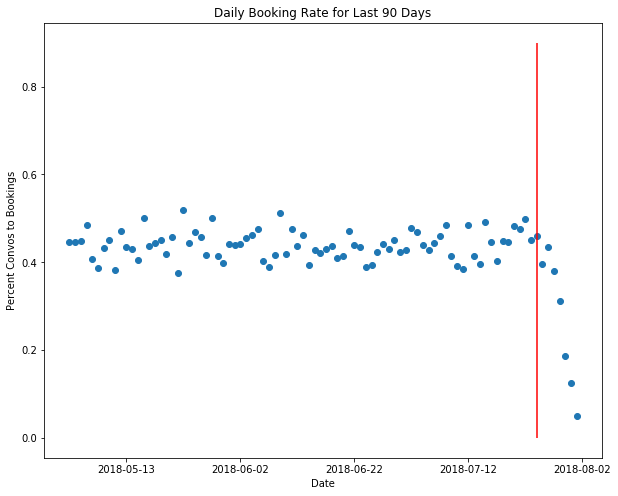

In [23]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(last_90.index, last_90['booking_rate'])
ax.set_title('Daily Booking Rate for Last 90 Days')
ax.set_ylabel('Percent Convos to Bookings')
ax.set_xlabel('Date')
ax.vlines(712, ymin=0, ymax=0.9, color='r')
labels = [0, '2018-05-13', '2018-06-02', '2018-06-22', '2018-07-12', '2018-08-02']
_x = ax.set_xticklabels(labels=labels)

#### Downward booking rate may be due to lag in booking rates, and we simply haven't waited long enough to know if conversations in the past week will result in bookings.  Lets look at the lag times between added and booked_at for conversations that result in bookings.

In [27]:
conversations_booked = conversations[~conversations['booked_at'].isna()] #find the booked conversations

In [28]:
conversations_booked.head()

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at,not_booked
5,6,2018-07-04,2018-07-07,3,2018-06-23 16:16:16.891344,78,NaN,64388,14772,2018-06-27 14:39:51.433544,NaT,0
6,7,2018-07-31,2018-08-04,4,2018-07-21 04:55:57.951572,100,NaN,64386,14783,2018-07-22 02:50:20.676664,NaT,0
8,9,2018-07-02,2018-07-03,1,2018-06-21 06:23:08.092389,23,NaN,64384,7656,2018-06-23 01:49:33.596667,NaT,0
10,11,2018-06-12,2018-06-18,6,2018-06-03 09:11:33.421951,300,NaN,64382,2512,2018-06-07 01:24:20.187356,NaT,0
12,13,2018-07-24,2018-07-27,3,2018-07-13 10:30:05.875588,126,NaN,64381,1634,2018-07-19 01:01:11.552880,NaT,0


In [29]:
days_booked = conversations_booked['booked_at']-conversations_booked['added']

In [30]:
conversations_booked['day_to_book'] = days_booked.dt.days.astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
conversations_booked['day_to_book'].describe()

count    33466.000000
mean         2.675701
std          1.807577
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         11.000000
Name: day_to_book, dtype: float64

In [32]:
confidence_95percent = 1.96*(1.807577)
confidence_95percent #computing the 95% confidence interval

3.54285092

In [33]:
booking_lags_df = conversations_booked.groupby([conversations['added'].dt.date])['day_to_book'].mean()

In [34]:
booking_lags_df = booking_lags_df.reset_index()

In [35]:
booking_lags_df_90 = booking_lags_df[-90:]

In [38]:
booking_lags_df_90.head()

,added,day_to_book
624,2018-05-04,2.484536
625,2018-05-05,2.485149
626,2018-05-06,2.621359
627,2018-05-07,2.380000
628,2018-05-08,2.967391


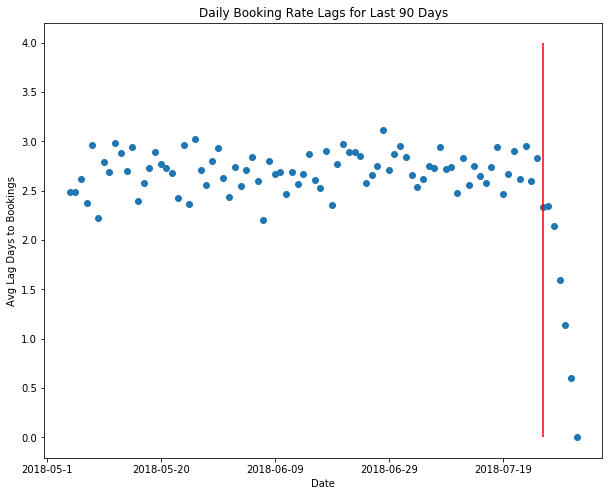

In [39]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(booking_lags_df_90.index, booking_lags_df_90['day_to_book'])
ax.set_title('Daily Booking Rate Lags for Last 90 Days')
ax.set_ylabel('Avg Lag Days to Bookings')
ax.set_xlabel('Date')
ax.vlines(707, ymin=0, ymax=4, color='r')
labels = [0, '2018-05-1', '2018-05-20', '2018-06-09', '2018-06-29', '2018-07-19']
_x = ax.set_xticklabels(labels=labels)